In [1]:
import pybamm
import os
import numpy as np
import matplotlib.pyplot as plt
os.chdir(pybamm.__path__[0]+'/..')

In [2]:
model = pybamm.lithium_ion.DFN()
chemistry = pybamm.parameter_sets.ORegan2022_adjusted
param = pybamm.ParameterValues(chemistry=chemistry)
param.update({"Ambient temperature [K]": 278.15})
param.update({"Maximum concentration in negative electrode [mol.m-3]": 32544})
param.update({"Maximum concentration in positive electrode [mol.m-3]": 56598})
param.update({"Initial concentration in negative electrode [mol.m-3]": 28162})
param.update({"Initial concentration in positive electrode [mol.m-3]": 15281})
exp = pybamm.Experiment(["Discharge at 1C until 2.5 V", "Charge at 0.3C until 4.2 V", "Hold at 4.2 V until C/100"])

pts200 = {
    "x_n": 20,  # negative electrode
    "x_s": 20,  # separator 
    "x_p": 20,  # positive electrode
    "r_n": 200,  # negative particle
    "r_p": 200,  # positive particle
}

sim200 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts200)
solution200 = sim200.solve(calc_esoh=False)

pts150 = {
    "x_n": 20,  # negative electrode
    "x_s": 20,  # separator 
    "x_p": 20,  # positive electrode
    "r_n": 150,  # negative particle
    "r_p": 150,  # positive particle
}

sim150 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts150)
solution150 = sim150.solve(calc_esoh=False)

pts120 = {
    "x_n": 20,  # negative electrode
    "x_s": 20,  # separator 
    "x_p": 20,  # positive electrode
    "r_n": 120,  # negative particle
    "r_p": 120,  # positive particle
}

sim120 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts120)
solution120 = sim120.solve(calc_esoh=False)

pts100 = {
    "x_n": 20,  # negative electrode
    "x_s": 20,  # separator 
    "x_p": 20,  # positive electrode
    "r_n": 100,  # negative particle
    "r_p": 100,  # positive particle
}

sim100 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts100)
solution100 = sim100.solve(calc_esoh=False)

pts60 = {
    "x_n": 20,  # negative electrode
    "x_s": 20,  # separator 
    "x_p": 20,  # positive electrode
    "r_n": 60,  # negative particle
    "r_p": 60,  # positive particle
}

sim60 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts60)
solution60 = sim60.solve(calc_esoh=False)

pts30 = {
    "x_n": 20,  # negative electrode
    "x_s": 20,  # separator 
    "x_p": 20,  # positive electrode
    "r_n": 30,  # negative particle
    "r_p": 30,  # positive particle
}

sim30 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts30)
solution30 = sim30.solve(calc_esoh=False)

The linesearch algorithm failed with too small a step.


In [3]:
t200 = solution200["Time [s]"].entries
t150 = solution150["Time [s]"].entries
t120 = solution120["Time [s]"].entries
t100 = solution100["Time [s]"].entries
t60 = solution60["Time [s]"].entries
t30 = solution30["Time [s]"].entries

In [4]:
Q200 = solution200["Discharge capacity [A.h]"].entries
V200 = solution200["Terminal voltage [V]"].entries
Q150 = solution150["Discharge capacity [A.h]"].entries
V150 = solution150["Terminal voltage [V]"].entries
Q120 = solution120["Discharge capacity [A.h]"].entries
V120 = solution120["Terminal voltage [V]"].entries
Q100 = solution100["Discharge capacity [A.h]"].entries
V100 = solution100["Terminal voltage [V]"].entries
Q60 = solution60["Discharge capacity [A.h]"].entries
V60 = solution60["Terminal voltage [V]"].entries
Q30 = solution30["Discharge capacity [A.h]"].entries
V30 = solution30["Terminal voltage [V]"].entries
"""
print(f"With 200 points, discharge capacity is {np.max(Q200)} Ah.")
print(f"With 150 points, discharge capacity is {np.max(Q150)} Ah.")
print(f"With 120 points, discharge capacity is {np.max(Q120)} Ah.")
print(f"With 100 points, discharge capacity is {np.max(Q100)} Ah.")
print(f"With 60 points, discharge capacity is {np.max(Q60)} Ah.")
print(f"With 30 points, discharge capacity is {np.max(Q30)} Ah.")
"""

'\nprint(f"With 400 points, discharge capacity is {np.max(Q400)} Ah.")\nprint(f"With 200 points, discharge capacity is {np.max(Q200)} Ah.")\nprint(f"With 150 points, discharge capacity is {np.max(Q150)} Ah.")\nprint(f"With 120 points, discharge capacity is {np.max(Q120)} Ah.")\nprint(f"With 100 points, discharge capacity is {np.max(Q100)} Ah.")\nprint(f"With 60 points, discharge capacity is {np.max(Q60)} Ah.")\nprint(f"With 30 points, discharge capacity is {np.max(Q30)} Ah.")\n'

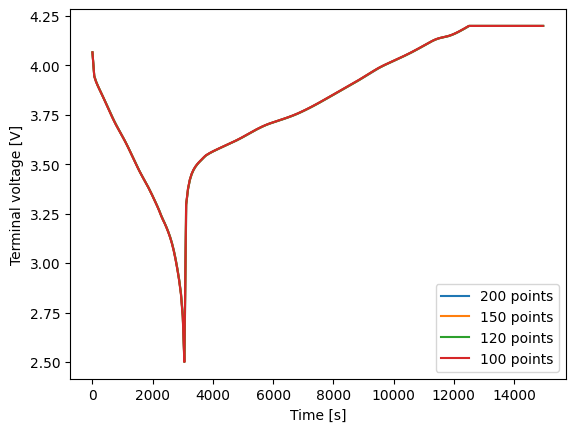

In [10]:
fig, ax = plt.subplots()
ax.plot(t200,V200,label="200 points")
ax.plot(t150,V150,label="150 points")
ax.plot(t120,V120,label="120 points")
ax.plot(t100,V100,label="100 points")
#ax.plot(t60,V60,label="60 points")
#ax.plot(t30,V30,label="30 points")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Terminal voltage [V]")
ax.legend()
#plt.savefig("/mnt/c/Users/sokane/pybamm_data/mesh_refinement/uniform_1C_discharge_0point3C_charge_278K.pdf")
plt.show()

In [8]:
t200_CV = solution200.cycles[2]["Time [s]"].entries
t150_CV = solution150.cycles[2]["Time [s]"].entries
t120_CV = solution120.cycles[2]["Time [s]"].entries
t100_CV = solution100.cycles[2]["Time [s]"].entries
t60_CV = solution60.cycles[2]["Time [s]"].entries
t30_CV = solution30.cycles[2]["Time [s]"].entries
I200 = solution200.cycles[2]["Current [A]"].entries
I150 = solution150.cycles[2]["Current [A]"].entries
I120 = solution120.cycles[2]["Current [A]"].entries
I100 = solution100.cycles[2]["Current [A]"].entries
I60 = solution60.cycles[2]["Current [A]"].entries
I30 = solution30.cycles[2]["Current [A]"].entries
Delta_t_CV_120 = t120_CV[-1]-t120_CV[0]
Delta_t_CV_100 = t100_CV[-1]-t100_CV[0]
print(f"For 120 points, CV phase lasts experiment ends at {Delta_t_CV_120} seconds.")
print(f"For 100 points, CV phase lasts experiment ends at {Delta_t_CV_100} seconds.")

For 120 points, CV phase lasts experiment ends at 2461.0340977354117 seconds.
For 100 points, CV phase lasts experiment ends at 2461.342004783888 seconds.


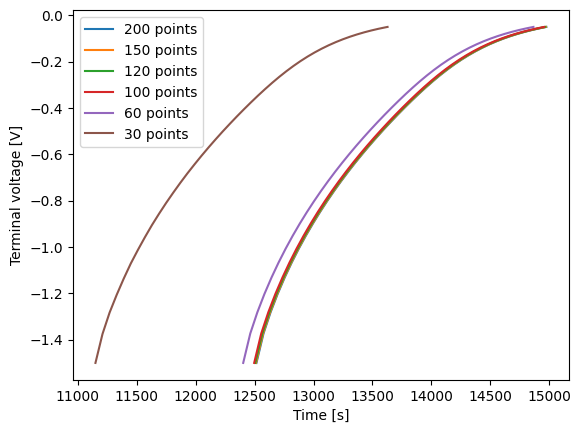

In [9]:
fig, ax = plt.subplots()
ax.plot(t200_CV,I200,label="200 points")
ax.plot(t150_CV,I150,label="150 points")
ax.plot(t120_CV,I120,label="120 points")
ax.plot(t100_CV,I100,label="100 points")
ax.plot(t60_CV,I60,label="60 points")
ax.plot(t30_CV,I30,label="30 points")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Terminal voltage [V]")
ax.legend()
plt.show()